In [ ]:
%matplotlib inline



The [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) data structure: continuous data
=============================================================

Continuous data is stored in objects of type [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html).
The core data structure is simply a 2D numpy array (channels × samples)
(in memory or loaded on demand) combined with an
[Info](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) object (`.info` attribute)
(see [The Info data structure](https://martinos.org/mne/stable/auto_tutorials/plot_info.html#tut-info-objects)).



Loading continuous data
-----------------------

The most common way to load continuous data is from a .fif file. For more
information on [loading data from other formats](https://martinos.org/mne/stable/manual/io.html#ch-convert), or
creating it [from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures).

In [1]:
import mne
import os.path as op
from matplotlib import pyplot as plt

Load an example dataset, the `preload` flag loads the data into memory now:

In [2]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(data_path, preload=True, verbose=False)

Information about this dataset can be found [here](https://mne.tools/stable/documentation/datasets.html#sample). Briefly, checkerboard patterns were presented to the subject into the left and right visual field, interspersed by tones to the left or right ear. Occasionally a smiley face was presented at the center of the visual field. The subject was asked to press a key with the right index finger as soon as possible after the appearance of the face.

We can control how much info MNE gives using the `verbose` parameter.

In [3]:
raw = mne.io.read_raw_fif(data_path, preload=True, verbose=True)

Opening raw data file /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


In [4]:
raw.set_eeg_reference('average', projection=True);  # set EEG average reference

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


We can output the information in the `raw` file by doing (NOTE: information may be formatted differently in terminal):

In [5]:
raw

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


or

In [6]:
raw.info

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


`info` a dictionary, so it can be read using similar syntax as a `dict`

In [7]:
# Give the sample rate
print('sample rate:', raw.info['sfreq'], 'Hz')
# Give the size of the data matrix
print('%s channels x %s samples' % (len(raw), len(raw.times)))

sample rate: 600.614990234375 Hz
166800 channels x 166800 samples


**Note:**
This size can also be obtained by examining `raw._data.shape`.
However this is a private attribute as its name starts
with an `_`. This suggests that you should **not** access this
variable directly but rely on indexing syntax detailed just below.

Information about the channels contained in the [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html)
object is contained in the [Info](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) attribute.
This is essentially a dictionary with a number of relevant fields (see
[The Info data structure](https://martinos.org/mne/stable/auto_tutorials/plot_info.html#tut-info-objects)).



Indexing data
-------------

To access the data stored within [Raw]((https://martinos.org/mne/stable/generated/mne.io.Raw.html)) objects,
it is possible to index the [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) object.

Indexing a [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) object will 
return two arrays: 
* an array of times, 
* the data representing those timepoints. 
    
This works even if the data is _not preloaded_, in which case the data will be
read from disk when indexing.


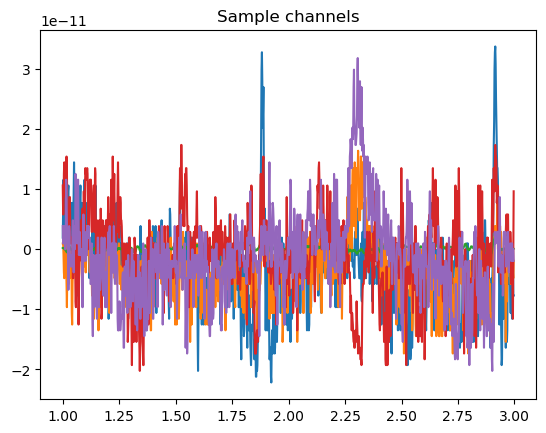

In [8]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 3)]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

Selecting subsets of channels and samples
-----------------------------------------

It is possible to use more intelligent indexing to extract data, using
channel names, types or time ranges.

Pull all MEG gradiometer channels:
Make sure to use .copy() or it will overwrite the data

In [9]:
meg_only = raw.copy().pick('meg')
grad_only = raw.copy().pick('grad')
eeg_only = raw.copy().pick('eeg')

Or you can use custom channel names

In [10]:
pick_chans = ['MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123']
specific_chans = raw.copy().pick(pick_chans)
print(meg_only)
print(eeg_only)
print(grad_only)
print(specific_chans)

<Raw | sample_audvis_raw.fif, 306 x 166800 (277.7 s), ~392.6 MB, data loaded>
<Raw | sample_audvis_raw.fif, 60 x 166800 (277.7 s), ~79.3 MB, data loaded>
<Raw | sample_audvis_raw.fif, 204 x 166800 (277.7 s), ~262.7 MB, data loaded>
<Raw | sample_audvis_raw.fif, 4 x 166800 (277.7 s), ~8.0 MB, data loaded>


And drop channels by name

In [11]:
nchan = raw.info['nchan']
raw = raw.drop_channels(['MEG 0241', 'EEG 001'])
print('Number of channels reduced from', nchan, 'to', raw.info['nchan'])

Number of channels reduced from 376 to 374


Concatenating  [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) objects
--------------------------------------------------

[Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) objects can be concatenated in time by using the
[raw.append](https://martinos.org/mne/dev/generated/mne.io.Raw.html#mne.io.Raw.append) function. For this to work, they must have the same number of channels and their [Info](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) structures should be compatible.



In [12]:
# Create multiple Raw objects
raw1 = raw.copy().crop(0, 10)
raw2 = raw.copy().crop(10, 20)
raw3 = raw.copy().crop(20, 40)

# Concatenate in time (also works without preloading)
raw1.append([raw2, raw3])
print('Time extends from', raw1.times.min(), 's to', raw1.times.max(), 's')

Time extends from 0.0 s to 40.00399655463821 s


Visualizing Raw data
--------------------
All of the plotting method names start with `plot`. If you’re using IPython console, you can just
write `raw.plot` and ask the interpreter for suggestions with a tab key.

To visually inspect your raw data, you can use:

In [13]:
import mne
mne.viz.set_browser_backend('matplotlib')
# mne.viz.set_browser_backend('qt')

Using matplotlib as 2D backend.


In [16]:
# %matplotlib qt

Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB



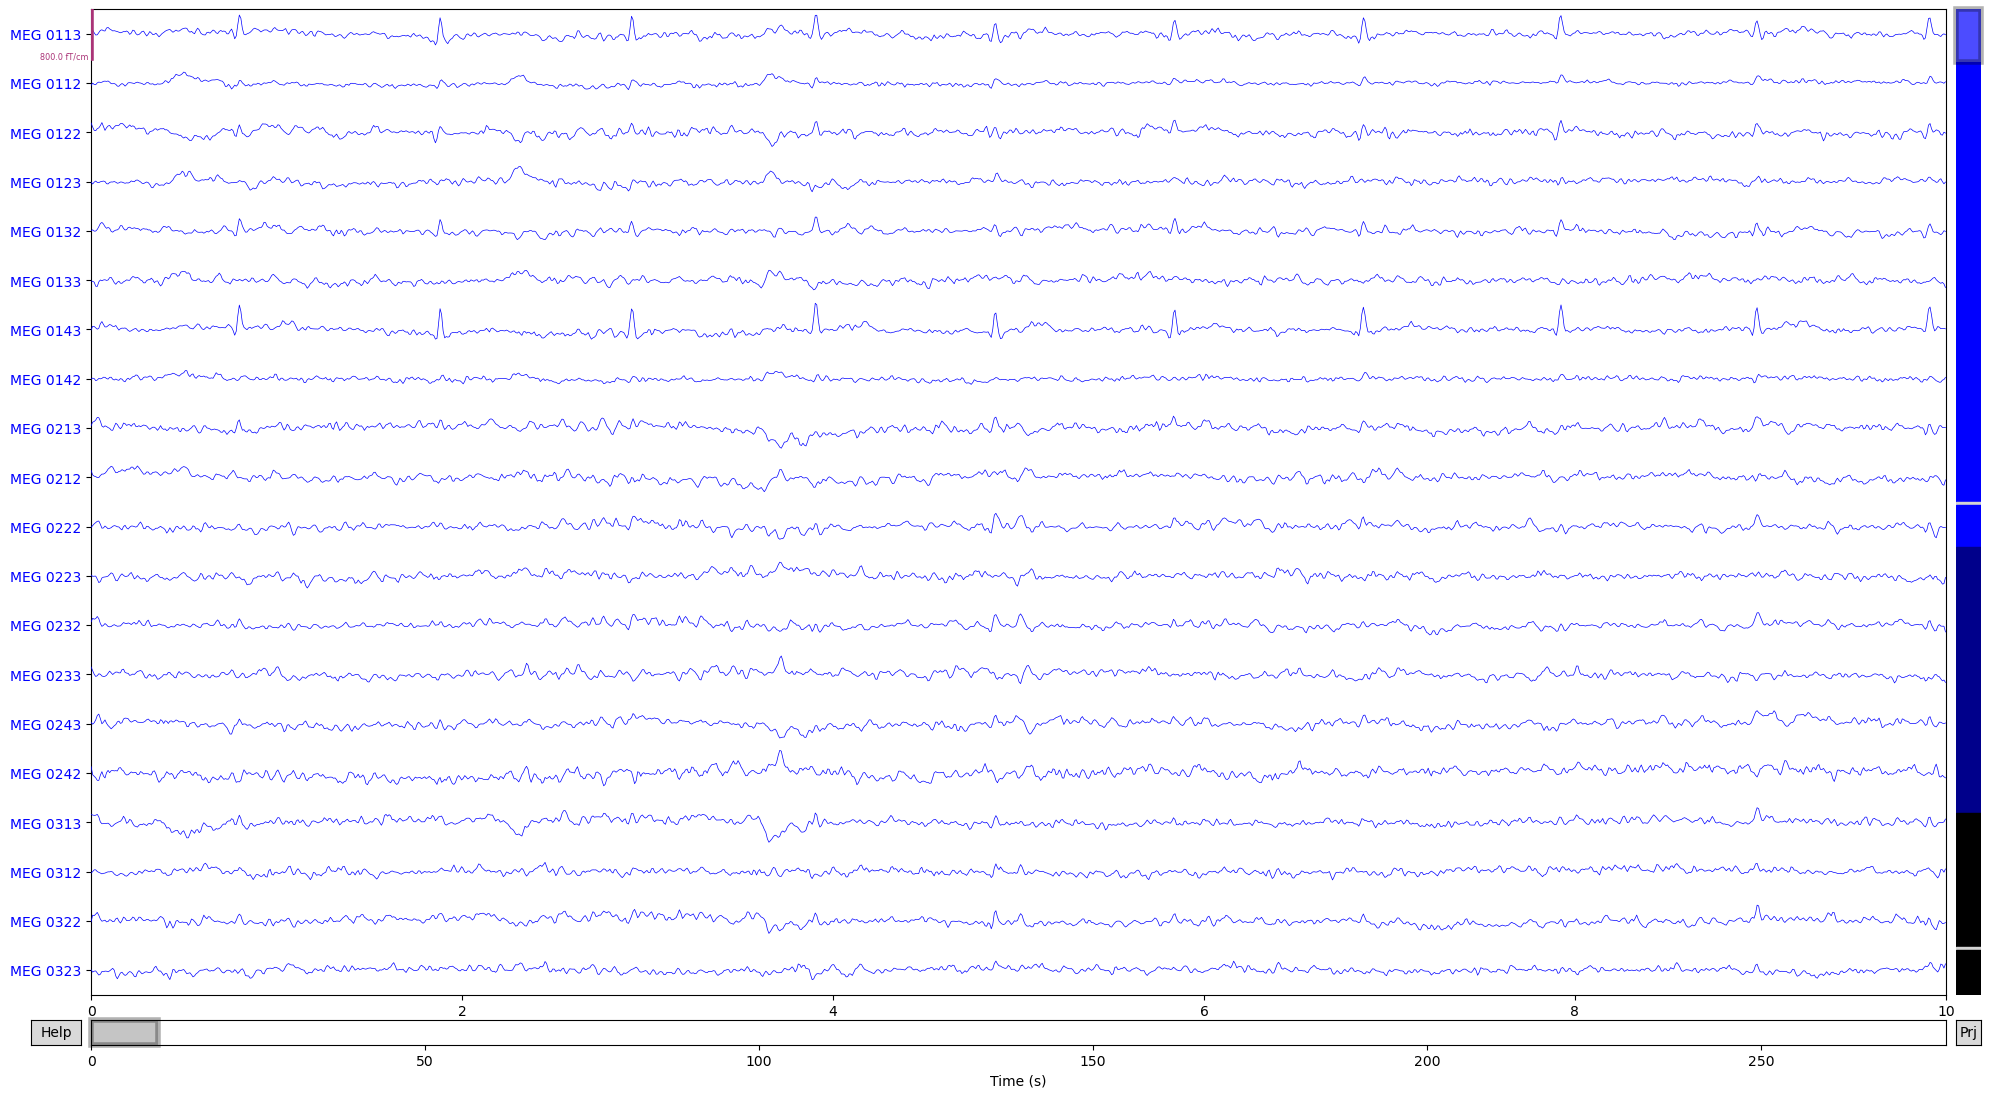

In [14]:
raw.plot(block=True, lowpass=40);

The channels are color coded by channel type. 
* MEG = blue, EEG = black
* Bad channels on scrollbar color coded gray. 
* Clicking the lines or channel names on the left, to mark or unmark a bad channel interactively. 
* +/- keys to adjust the scale (also = works for magnifying the data).
* Initial scaling factors can be set with parameter `scalings`. 
* If you don’t know the scaling factor for channels, you can automatically set them by passing scalings=’auto’. 
* With `pageup/pagedown` and `home/end` keys you can adjust the amount of data viewed at once.

In [11]:
%matplotlib inline

We can also plot the PSD:

Setting 2183 of 166800 (1.31%) samples to NaN, retaining 164617 (98.69%) samples.
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


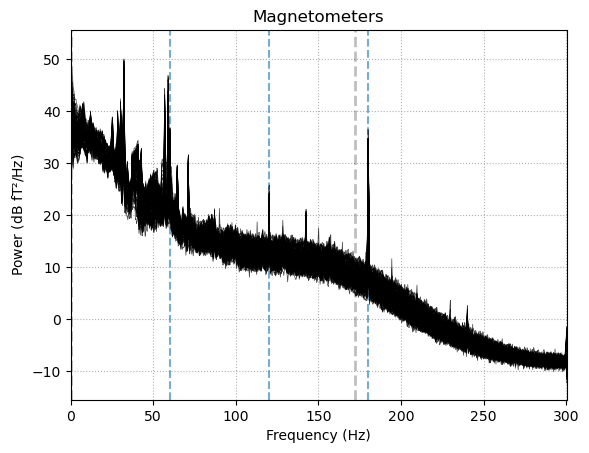

In [12]:
fig, ax = plt.subplots(1, 1)
raw.compute_psd(picks='mag').plot(spatial_colors=False, amplitude=False, show=False, axes=ax);
for freq in [60., 120., 180.]:
    ax.axvline(freq, linestyle='--', alpha=0.6)

In [ ]:
Can be used to inspect:
* Power line
* Bad channels
* Head position indicator coils
* Whether data is filtered or not

Exercises
--------------

1) Quite often the EOG channel is not marked correctly in the raw data. You may need to rename it. Can you figure out how to do this?

In [47]:
# your code here

2) How will you check that at least one EEG channel exists in the data?

In [48]:
# your code here

3) Can you plot the data in the trigger channel?

*HINT*: The channel type is called 'stim'

In [49]:
from mne import pick_types
import matplotlib.pyplot as plt

# your code here



The [mne.Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) data structure: epoched data
=============================================================

[Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) objects are a way of representing continuous
data as a collection of time-locked trials, stored in an array of shape
``(n_events, n_channels, n_times)``. They are useful for many statistical
methods in neuroscience, and make it easy to quickly overview what occurs
during a trial.



Creating epochs
=============

[Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) objects can be created in three ways:
 1. From a [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) object, along with event times
 2. From an [Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) object that has been saved as a
    `.fif` file
 3. From scratch using [EpochsArray](https://martinos.org/mne/dev/generated/mne.EpochsArray.html#mne.EpochsArray). See
    [Creating MNE's data structures from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures)



Import packages

In [15]:
import mne
import os.path as op
import numpy as np
from matplotlib import pyplot as plt

Then, we will load the data

In [16]:
data_path = mne.datasets.sample.data_path()
# Load a dataset that contains events
raw = mne.io.read_raw_fif(
    op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif'))

Opening raw data file /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


Extract events
--------------

In [17]:
# If your raw object has a stim channel, you can construct an event array
# easily
events = mne.find_events(raw, stim_channel='STI 014')

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


Look at the first 5 events (onset, value before event, event id):

In [18]:
print(events[:5])

[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]


We can plot the events

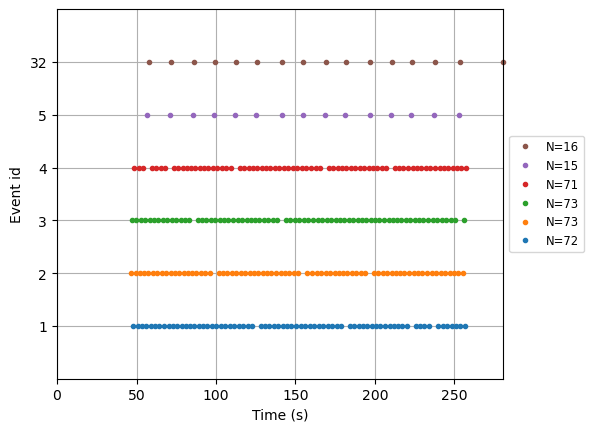

In [19]:
mne.viz.plot_events(events, sfreq=raw.info['sfreq']);

Specify event codes of interest with descriptive labels.

This dataset also has visual left (3) and right (4) events, but
to save time and memory we'll just look at the auditory conditions
for now.

In [20]:
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}

Expose the raw data as epochs, cut from -0.1 s to 1.0 s relative to the event
onsets

In [21]:
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)
print(epochs)

Not setting metadata
145 matching events found
Setting baseline interval to [-0.09989760657919393, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 145 events and 662 original time points ...
0 bad epochs dropped
<Epochs |  145 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~278.6 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


Note that epochs constructed in this manner will not have their
data available until explicitly read into memory, which you can do with
[get_data](https://martinos.org/mne/dev/generated/mne.Epochs.html#mne.Epochs.get_data). Alternatively, you can use
`preload=True`.

Epochs behave similarly to [`mne.io.Raw`](https://martinos.org/mne/dev/generated/mne.io.Raw.html#mne.io.Raw) objects. They have an
[`info`](https://martinos.org/mne/dev/generated/mne.Info.html#mne.Info) attribute that has all of the same
information, as well as a number of attributes unique to the events contained
within the object.



In [22]:
print(epochs.events[:3])
print(epochs.event_id)

[[27977     0     2]
 [28771     0     1]
 [29652     0     2]]
{'Auditory/Left': 1, 'Auditory/Right': 2}


Indexing epochs
=============

You can select subsets of epochs by indexing the [Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) 
object directly. Alternatively, if you have epoch names specified in
`event_id` then you may index with strings instead.


In [23]:
print(epochs[1:5])
epochs['Auditory/Right']

<Epochs |  4 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~10.8 MB, data loaded,
 'Auditory/Left': 2
 'Auditory/Right': 2>


Number of events,73
Events,Auditory/Right: 73
Time range,-0.100 – 1.001 s
Baseline,-0.100 – 0.000 s


Note the '/'s in the event code labels. These separators allow tag-based
selection of epoch sets; Epoch names containing `'Auditory/Left'` and `'Auditory/Right'` are *both* included when indexed by `epochs['Auditory']`:

In [24]:
print(epochs['Auditory'])
print(epochs['Auditory/Right'])
print(epochs['Right'])

<Epochs |  145 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~278.6 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>
<Epochs |  73 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~141.8 MB, data loaded,
 'Auditory/Right': 73>
<Epochs |  73 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~141.8 MB, data loaded,
 'Auditory/Right': 73>


Dropping epochs
-------------------------

* Manually by using [epochs.drop(idx)](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.drop), 
* Using rejection or flat thresholds with [epochs.drop_bad(reject, flat)](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.drop_bad).

In [25]:
epochs.drop([0], reason='User reason')
epochs.drop_bad(reject=dict(grad=2500e-13, mag=4e-12, eog=200e-6), flat=None)

Dropped 1 epoch: 0
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1421']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1421']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  ep

Number of events,121
Events,Auditory/Left: 57Auditory/Right: 64
Time range,-0.100 – 1.001 s
Baseline,-0.100 – 0.000 s


You can also inspect the reason why epochs were dropped.

In [26]:
print(epochs.drop_log);

(('User reason',), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), ('EOG 061',), ('IGNORED',), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), ('IGNORED',), (), ('IGNORED',), ('EOG 061',), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), ('IGNORED',), ('EOG 061',), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), ('IGNORED',), ('IGNORED',), ('IGNORED',), ('EOG 061',), ('IGNORED',), ('EOG 061',), ('IGNORED',), ('EOG 061',), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED',), (), ('IGNORED

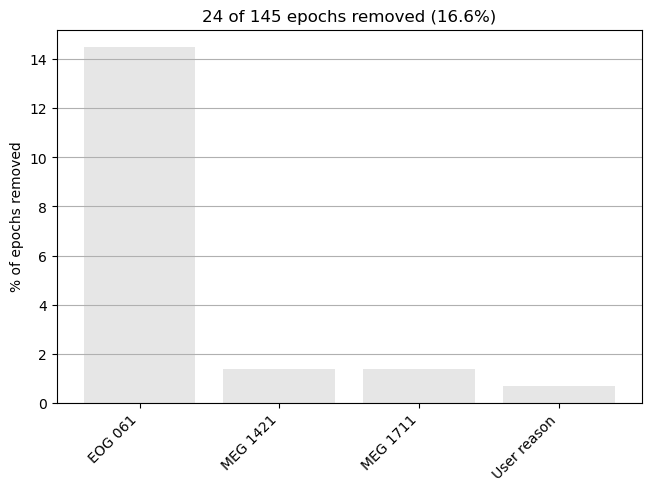

In [27]:
epochs.plot_drop_log();

The indices from the original set of events are stored in ``epochs.selection``.

In [28]:
print(epochs.selection)

[  2   4   6   8  10  12  14  19  21  23  25  27  29  31  33  35  38  42
  44  46  48  50  52  54  56  58  63  65  67  69  71  73  75  77  88  90
  92  94  96  98 101 103 105 107 109 111 113 115 117 122 126 128 130 132
 134 136 138 140 142 145 151 153 155 157 159 161 168 170 174 176 178 182
 184 189 191 193 197 199 201 206 214 218 220 222 224 229 231 233 235 237
 239 241 243 245 248 250 252 254 256 258 262 264 269 271 273 281 285 290
 292 294 296 298 300 302 304 306 308 310 313 315 317]


Input/Output
------------------

If you wish to save the epochs as a file, you can do it with
[mne.Epochs.save](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.save). To conform to MNE naming conventions, the
epochs file names should end with '-epo.fif'.


In [29]:
epochs_fname = op.join(data_path, 'MEG', 'sample', 'sample-epo.fif')
epochs.save(epochs_fname, overwrite=True)

Overwriting existing file.
Overwriting existing file.


Later on you can read the epochs with [`mne.read_epochs`](https://martinos.org/mne/dev/generated/mne.read_epochs.html#mne.read_epochs). For reading
EEGLAB epochs files see [`mne.read_epochs_eeglab`](https://martinos.org/mne/dev/generated/mne.read_epochs_eeglab.html#mne.read_epochs_eeglab). We can also use
``preload=False`` to save memory, loading the epochs from disk on demand.

In [30]:
epochs = mne.read_epochs(epochs_fname, preload=False)

Reading /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample-epo.fif ...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
    Found the data of interest:
        t =     -99.90 ...    1000.64 ms
        0 CTF compensation matrices available
Not setting metadata
121 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
3 projection items activated


If you wish to look at the average across trial types, then you may do so,
creating an [`Evoked`](https://martinos.org/mne/dev/generated/mne.Evoked.html) object in the process. Instances
of `Evoked` are usually created by calling [`mne.Epochs.average`](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.average).


# Visualizing epochs data

We can visualize epochs the same way as raw data

Loading data for 20 events and 662 original time points ...


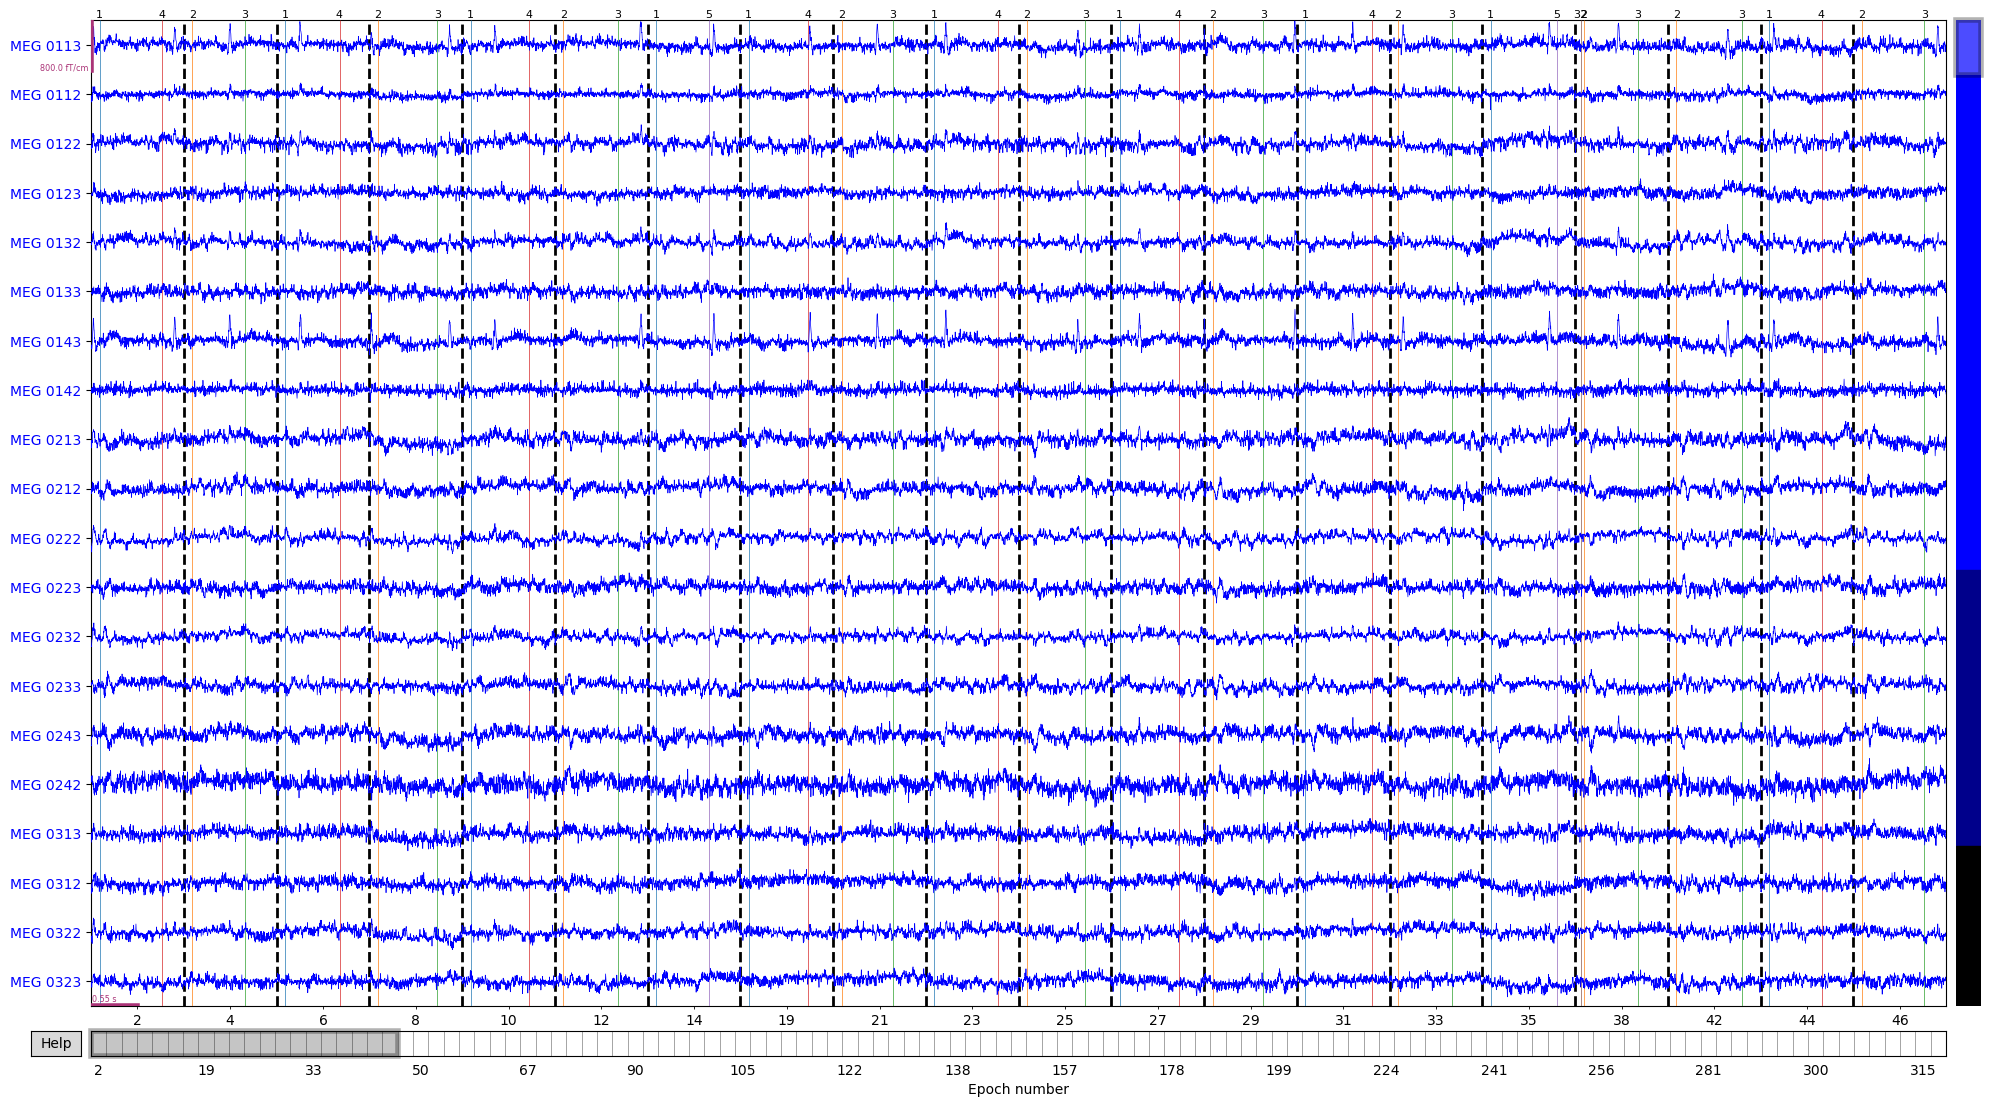

In [31]:
epochs.plot(block=True, events=events);

We can mark bad epochs interactively and scroll through the data

It's also possible to plot a single epoch as an image

Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated


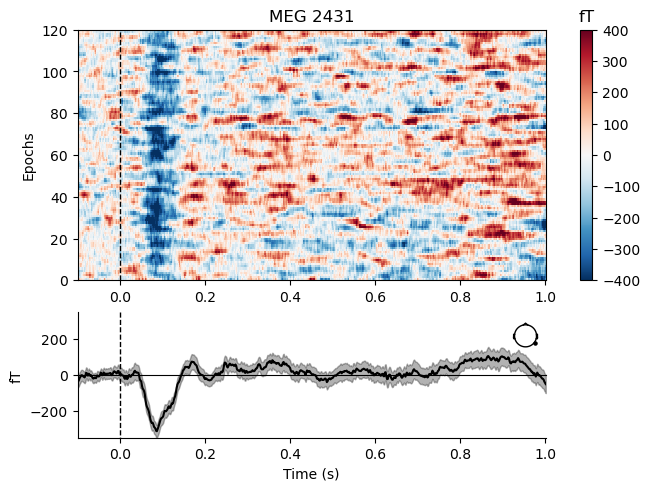

In [44]:
epochs.plot_image(278, cmap='interactive', sigma=1., vmin=-400, vmax=400);

Exercises
--------------
1) Can you find out the indices of the epochs that have been removed due to eyeblinks?

In [66]:
epochs = mne.read_epochs(epochs_fname, preload=False)
# your code here
# print(idxs)

Reading /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample-epo.fif ...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
    Found the data of interest:
        t =     -99.90 ...    1000.64 ms
        0 CTF compensation matrices available
Not setting metadata
145 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
3 projection items activated


2) Can you find the indices of channels corresponding to `EOG 061`?

In [67]:
# your code here
# print(epochs.info['ch_names'][picks])

3) Can you plot the EOG channel for these epochs and verify that these do indeed contain eyeblinks?

In [68]:
# your code here



The [mne.Evoked](https://martinos.org/mne/dev/generated/mne.Evoked.html) data structure: evoked/averaged data
=====================================================================

The [`mne.Evoked`](https://martinos.org/mne/dev/generated/mne.Evoked.html) data structure is mainly used for storing
averageddata over trials. In MNE the evoked objects are usually created by
averaging epochs data with [`mne.Epochs.average`](https://martinos.org/mne/dev/generated/mne.Epochs.html#mne.Epochs.average).



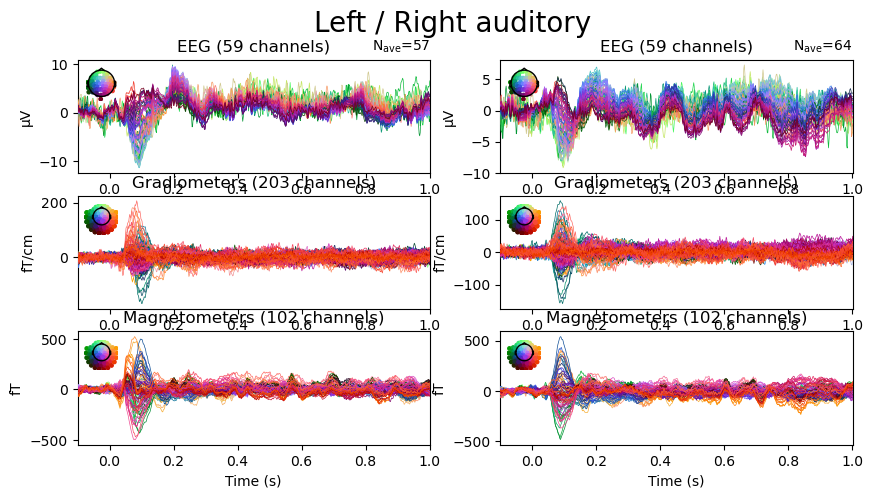

In [32]:
ev_left = epochs['Auditory/Left'].average()
ev_right = epochs['Auditory/Right'].average()

f, axs = plt.subplots(3, 2, figsize=(10, 5))
_ = f.suptitle('Left / Right auditory', fontsize=20)
_ = ev_left.plot(axes=axs[:, 0], show=False, time_unit='s')
_ = ev_right.plot(axes=axs[:, 1], show=False, time_unit='s')

Visualization
-------------

We can plot the evoked response

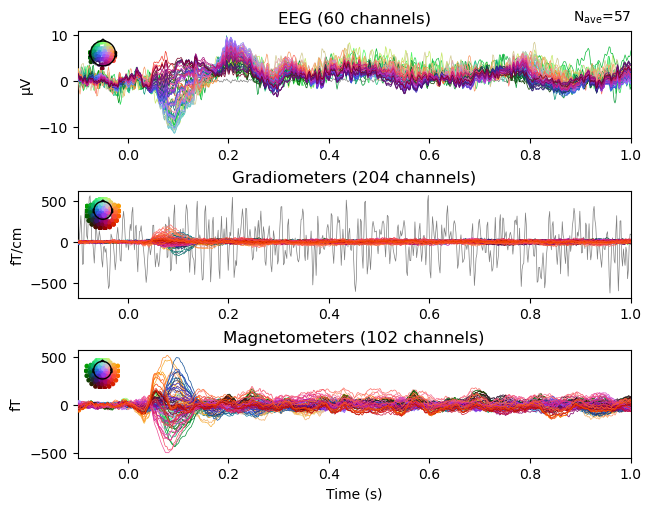

In [33]:
evoked = ev_left
evoked.plot(time_unit='s', exclude=[]);

In [34]:
print(evoked.info)
print(evoked.times)

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 60 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 366
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: on, PCA-v2: on, PCA-v3: on
 sfreq: 600.6 Hz
>
[-0.09989761 -0.09823265 -0.09656769 -0.09490273 -0.09323777 -0.09157281
 -0.08990785 -0.08824289 -0.08657793 -0.08491297 -0.08324801 -0.08158305
 -0.07991809 -0.07825313 -0.07658817 -0.0749232  -0.07325824

In [35]:
print(evoked.nave)  # Number of averaged epochs.
print(evoked.first)  # First time sample.
print(evoked.last)  # Last time sample.
print(evoked.comment)  # Comment on dataset. Usually the condition.
print(evoked.kind)  # Type of data, either average or standard_error.

57
-60
601
Auditory/Left
average


In [36]:
data = evoked.data
print(data.shape)

(366, 662)


In [37]:
print('Data from channel {0}:'.format(evoked.ch_names[10]))
print(data[10])

Data from channel MEG 0142:
[-1.89154566e-13 -3.24502728e-13 -5.61361955e-13 -1.89154601e-13
  8.76711968e-13  6.90608347e-13 -6.12117492e-13 -6.12117489e-13
 -1.89154571e-13 -6.12117512e-13 -6.12117523e-13 -1.99694119e-14
  2.33808357e-13  4.19912057e-13  3.35319453e-13 -3.75258278e-13
 -2.90665668e-13  5.04504653e-13  1.06281570e-12  9.27467567e-13
  5.04504644e-13 -5.38064295e-14 -2.90665672e-13  1.32297265e-13
  4.02993524e-13  6.73689779e-13  1.06281568e-12  7.07526841e-13
 -2.56828627e-13 -1.15351005e-12 -5.27524920e-13  4.77046687e-14
 -5.44443428e-13 -9.33569324e-13 -5.95198988e-13 -1.99694010e-14
  5.72178729e-13  7.75200885e-13  4.70667593e-13 -4.09095297e-13
 -6.29036019e-13 -2.73747160e-13 -2.90665655e-13 -4.26013802e-13
  8.15416874e-14  6.22934237e-13 -7.07249535e-14 -6.29036030e-13
 -2.39910111e-13  2.33808343e-13  1.99971328e-13  1.38676225e-14
  6.46231755e-14  8.15416974e-14  9.84602513e-14  1.99971330e-13
 -1.99694183e-14 -1.55317541e-13 -3.24502713e-13 -1.38399008e-

If you have your array data and you want to leverage the functionality of evoked, you can create an evoked object:

In [38]:
evoked = mne.EvokedArray(data, evoked.info, tmin=evoked.times[0])


For more information, see
[Creating MNE's data structures from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures).

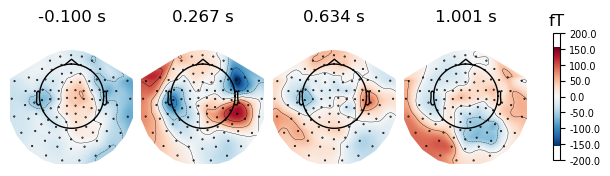

In [39]:
evoked.plot_topomap();

Projections have already been applied. Setting proj attribute to True.


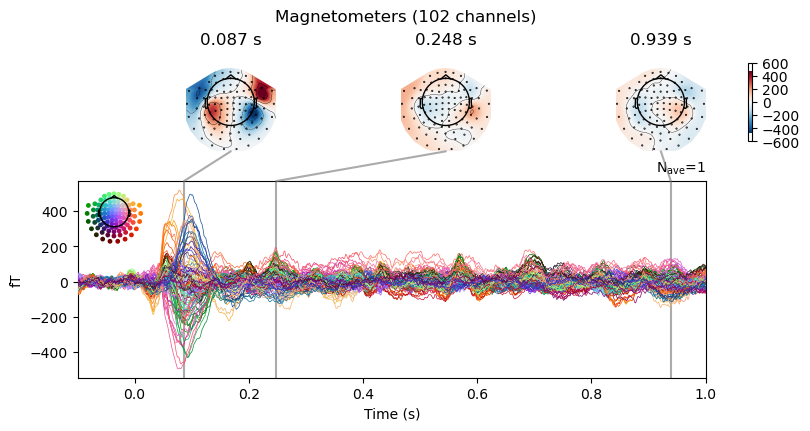

In [40]:
evoked.plot_joint(picks='mag');

Reading in evoked data from a file is easy

In [41]:
data_path = mne.datasets.sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')
evokeds = mne.read_evokeds(fname, baseline=(None, 0), proj=True)
print(evokeds)

Reading /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline cor

We can also create a contrast:

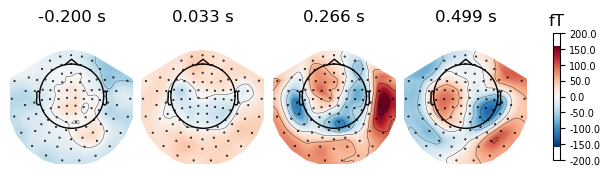

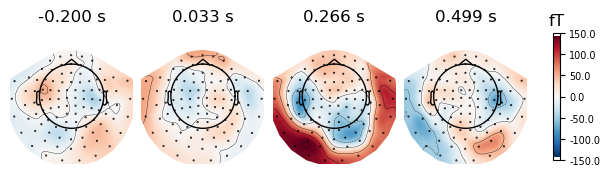

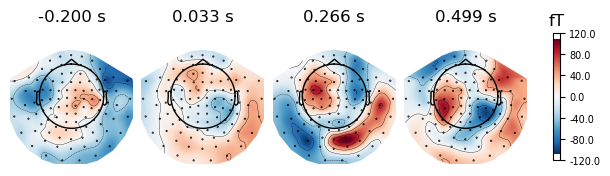

In [42]:
evokeds[2].plot_topomap();
evokeds[3].plot_topomap();
contrast = mne.combine_evoked(evokeds[2:], weights=[1, -1])
contrast.plot_topomap();

Exercises
--------------

1) How will you save evoked data to disk?


In [94]:
# your code here

2) Can you plot the topomap at 10 evenly spaced time instances?

HINT: Use np.linspace

In [96]:
# your code here



The [`Info`](https://martinos.org/mne/stable/generated/mne.Info.html) data structure
===========================================

The [`Info`](https://martinos.org/mne/stable/generated/mne.Info.html) data object is typically created
when data is imported into MNE-Python and contains details such as:

- date, subject information, and other recording details
- the sampling rate
- information about the data channels (name, type, position, etc.)
- digitized points
- sensor–head coordinate transformation matrices

and so forth. See the [`the API reference`](https://martinos.org/mne/stable/generated/mne.Info.html)
for a complete list of all data fields. Once created, this object is passed
around throughout the data analysis pipeline.



In [45]:
import mne
import os.path as op

In [47]:
# Read the info object from an example recording
info = mne.io.read_info(
    op.join(mne.datasets.sample.data_path(), 'MEG', 'sample',
            'sample_audvis_raw.fif'), verbose=False)

[`mne.Info`](https://martinos.org/mne/stable/generated/mne.Info.html) behaves as a nested Python dictionary:



In [48]:
print('Keys in info dictionary:\n', info.keys())

Keys in info dictionary:
 dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])


In [49]:
print(info['chs'][0])

{'scanno': 1, 'logno': 113, 'kind': 1 (FIFFV_MEG_CH), 'range': 0.00030517578125, 'cal': 3.1600000394149674e-09, 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1), 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
       -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
        0.18674099,  0.013541  ]), 'unit': 201 (FIFF_UNIT_T_M), 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'MEG 0113', 'coord_frame': 1 (FIFFV_COORD_DEVICE)}


In [18]:
print(info['sfreq'], 'Hz')

600.614990234375 Hz



Obtaining subsets of channels
-----------------------------

There are a number of convenience functions to obtain channel indices, given
an [`mne.Info`](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) object.



Channel types
-------------

MNE supports different channel types:

- eeg : For EEG channels with data stored in Volts (V)
- meg (mag) : For MEG magnetometers channels stored in Tesla (T)
- meg (grad) : For MEG gradiometers channels stored in Tesla/Meter (T/m)
- ecg : For ECG channels stored in Volts (V)
- seeg : For Stereotactic EEG channels in Volts (V).
- ecog : For Electrocorticography (ECoG) channels in Volts (V).
- fnirs (HBO) : Functional near-infrared spectroscopy oxyhemoglobin data.
- fnirs (HBR) : Functional near-infrared spectroscopy deoxyhemoglobin data.
- emg : For EMG channels stored in Volts (V)
- bio : For biological channels (AU).
- stim : For the stimulus (a.k.a. trigger) channels (AU)
- resp : For the response-trigger channel (AU)
- chpi : For HPI coil channels (T).
- exci : Flux excitation channel used to be a stimulus channel.
- ias : For Internal Active Shielding data (maybe on Triux only).
- syst : System status channel information (on Triux systems only).

Obtaining information about channels
------------------------------------



Channel type of a specific channel

In [50]:
channel_type = mne.channel_type(info, 75)
print('Channel #75 is of type:', channel_type)

Channel #75 is of type: grad


In [51]:
meg_channels = mne.pick_types(info, meg=True)[:10]
channel_types = [mne.channel_type(info, ch) for ch in meg_channels]
print('First 10 MEG channels are of type:\n', channel_types)

First 10 MEG channels are of type:
 ['grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad']


Dropping channels from an info structure
----------------------------------------

It is possible to limit the info structure to only include a subset of
channels with the [`mne.pick_info`](https://martinos.org/mne/stable/generated/mne.pick_info.html#mne.pick_info) function:



In [53]:
# Only keep EEG channels
eeg_indices = mne.pick_types(info, meg=False, eeg=True)
reduced_info = mne.pick_info(info, eeg_indices)

print(reduced_info)

<Info | 19 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>
